In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy import special
from numpy import poly1d
import scipy.integrate as integrate

# Zad 1 

a) 

In [15]:
def simpson(f, a, b):
    return ((b - a) * (f(a) + 4 * f((a + b) / 2) + f(b)))/6

def analytical(a, b, i):
    return (b**(i+1) - a**(i+1))/(i+1)
    

f0 = lambda x: 1
f1 = lambda x: x
f2 = lambda x: x**2
f3 = lambda x: x**3
f4 = lambda x: x**4
f5 = lambda x: x**5
f6 = lambda x: x**6
f7 = lambda x: x**7
f8 = lambda x: x**8

functions = [f0, f1, f2, f3, f4, f5, f6, f7, f8]

for i, f  in enumerate(functions[:-3]):
    print("Stopień wielomianu: ", i)
    print("Simpson: ", simpson(f,0,8))
    print("Analitycznie:", analytical(0,8, i))
    print("")

    

Stopień wielomianu:  0
Simpson:  8.0
Analitycznie: 8.0

Stopień wielomianu:  1
Simpson:  32.0
Analitycznie: 32.0

Stopień wielomianu:  2
Simpson:  170.66666666666666
Analitycznie: 170.66666666666666

Stopień wielomianu:  3
Simpson:  1024.0
Analitycznie: 1024.0

Stopień wielomianu:  4
Simpson:  6826.666666666667
Analitycznie: 6553.6

Stopień wielomianu:  5
Simpson:  49152.0
Analitycznie: 43690.666666666664



Wyniki zgadzają się do wielomianu 3. stopnia. Przy 4. pojawia się błąd, przy kolejncyh stopniach również. Zgadza się to z uwagą z wykładu - wzór ten jest dokładny dla funkcji sześciennych. 

b) 

In [16]:
f_exp_sin = lambda x: np.exp(-3*x)* np.sin(4*x)

def simpson(f, a, b):
    return ((b - a) * (f(a) + 4 * f((a + b) / 2) + f(b)))/6

print("Wartość na całym przedziale [0,5]: ")
print(simpson(f_exp_sin, 0, 5))
print("Suma na [0,1] i [1,5]: ")
print(simpson(f_exp_sin, 0, 1) + simpson(f_exp_sin,1,5) )

Wartość na całym przedziale [0,5]: 
-0.0010027325181523321
Suma na [0,1] i [1,5]: 
0.10368557622593552


Wyniki różnią się, co więcej oba nie są poprawne. Jest to spowodowane przez specyficzny kształt tej funkcji. 

c)

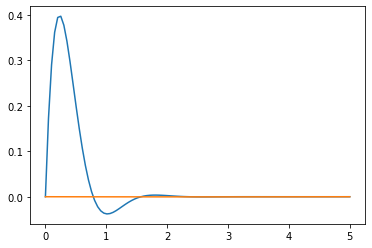

In [17]:
def plot(f, func_interpolate, a, b):
    x_plot = np.linspace(0,5,100)
    y_plot = f(x_plot)
    plt.plot(x_plot, y_plot)
    y_plot = func_interpolate(x_plot)
    plt.plot(x_plot, y_plot)

x_plot = np.linspace(0,5,3) #poczatek, srodek, koniec
y_plot = f_exp_sin(x_plot)
func_interpolate = interpolate.interp1d(x_plot, y_plot,kind = 'quadratic')

plot(f_exp_sin, func_interpolate, 0, 5)


# Zad 2

Kwadratura adaptacyjna Simpsona - przy jej implementowaniu korzystałam z algorytmu z książki "Numerical Mathematics and Computing" Cheney, Kincaid.

In [18]:
def adaptive_simpson(f, right, left, accuracy, div):
    h = left - right
    c = (right + left) / 2
    div.append(c)
    one_simpson = h * (f(right) + 4 * f(c) + f(left)) / 6
    d = (right + c) / 2
    div.append(d)
    e = (c + left) / 2
    div.append(e)
    two_simpson = h * (f(right)+ 4 * f(d) + 2 * f(c) + 4 * f(e) + f(left)) / 12
    if abs(two_simpson - one_simpson) < 15 * accuracy:
        return two_simpson + (two_simpson - one_simpson) / 15
    else:
        left_sim = adaptive_simpson(f, right, c, accuracy/2, div)
        right_sim = adaptive_simpson(f, c, left, accuracy/2, div)
        simpson_result = left_sim + right_sim
        return simpson_result

In [19]:
f_exp_sin = lambda x: np.exp(-3*x)* np.sin(4*x)
div = []
print(adaptive_simpson(f_exp_sin, 0, 5, (0.5)*10**(-7),div))

0.15999995829128047


Wynik różni się od tych wyliczonych w zadaniu 1b. Jest to wynik poprawny.

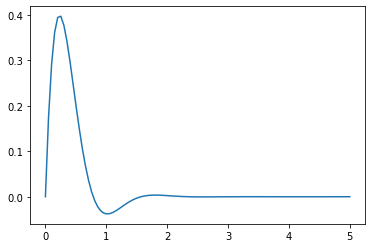

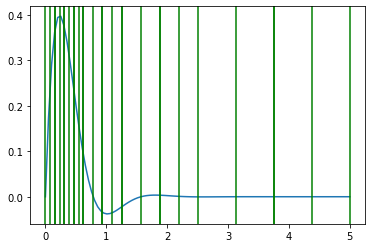

In [20]:
def plot_adaptive_simpson(sub = False):
    div = []
    x_plot = np.linspace(0,5, 100)
    y_plot = f_exp_sin(x_plot)
    plt.plot(x_plot, y_plot)
    adaptive_simpson(f_exp_sin, 0, 5, 1e-3, div)
    div.append(0)
    div.append(5)
    if sub:
        for d in div:
            plt.axvline(d, 0, 1, c= 'g')
    plt.show()
    
plot_adaptive_simpson()
plot_adaptive_simpson(True)
    

Dzięki podzieleniu głównego przedziału na mniejsze podprzedziały kwadratura adapatacyjna Simpsona jest lepszą metodą niż elementarna metoda Simpsona. Na wykresie powyżej widać, w jaki sposób algorytm dzieli główny przedział. W miejsce, gdzie funkcja jest bardziej "spiczasta" i wartości są trudniejsze do policzenia, podprzedziały są mniejsze i jest ich więcej.

# Zad 3

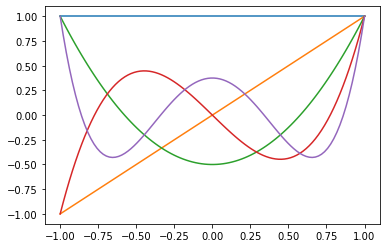

In [21]:
def legendre(n):
    if n==0:
        return poly1d([1])
    if n==1:
        return poly1d([1,0])
    return (2*n-1)/(n) *poly1d([1,0]) * legendre(n-1) - (n-1)/(n)*legendre(n-2)
     
def plot_legendre():
    x_plot = np.linspace(-1,1,100)
    for i in range(5):
        func = legendre(i)
        y_plot = func(x_plot)
        plt.plot(x_plot, y_plot)
    plt.show()
        
plot_legendre()

Zad 3b:

In [22]:
for i in range(2,5):
    print(i)
    f = legendre(i)
    print("Miejsca zerowe wielomianu Legendre:", f.r)
    print("Odcięte punktów Guassa: ", special.roots_legendre(i)[0])

2
Miejsca zerowe wielomianu Legendre: [ 0.57735027 -0.57735027]
Odcięte punktów Guassa:  [-0.57735027  0.57735027]
3
Miejsca zerowe wielomianu Legendre: [ 0.77459667 -0.77459667  0.        ]
Odcięte punktów Guassa:  [-0.77459667  0.          0.77459667]
4
Miejsca zerowe wielomianu Legendre: [-0.86113631  0.86113631 -0.33998104  0.33998104]
Odcięte punktów Guassa:  [-0.86113631 -0.33998104  0.33998104  0.86113631]


Miejsca zerowe wielomianów oratgonalnych Legendre'a wylicznonych przeze mnie zgadzają się z odciętymi kwadratury Gaussa dla przedziału (-1,1). Przy ich pomocy możemy policzyć całkę jako sumę ilorazu odpowiednych współczynników i wartości funkcji w miejscach zerowych 

# Zad 4

c) 

In [23]:
def gauss(f, k): 
    coeff = special.roots_legendre(k)[1]
    w = special.roots_legendre(k)[0]
#     print("Współczynniki: ", coeff)
#     print("Miejsca zerowe: ", w)
    ans = 0
    for el in range(k):
        ans += coeff[el]*f(w[el])  
    return ans

In [24]:
for k in range(2,5):
    print(f'k = {k}')
    for i, f in enumerate(functions):
        print(f'Stopień wielomianu: {i}')
        print(F'Gauss: {gauss(f, k)} Analitycznie: {analytical(-1,1,i)}' )
    print("")

k = 2
Stopień wielomianu: 0
Gauss: 2.0 Analitycznie: 2.0
Stopień wielomianu: 1
Gauss: 0.0 Analitycznie: 0.0
Stopień wielomianu: 2
Gauss: 0.6666666666666666 Analitycznie: 0.6666666666666666
Stopień wielomianu: 3
Gauss: 0.0 Analitycznie: 0.0
Stopień wielomianu: 4
Gauss: 0.22222222222222218 Analitycznie: 0.4
Stopień wielomianu: 5
Gauss: 0.0 Analitycznie: 0.0
Stopień wielomianu: 6
Gauss: 0.07407407407407404 Analitycznie: 0.2857142857142857
Stopień wielomianu: 7
Gauss: 0.0 Analitycznie: 0.0
Stopień wielomianu: 8
Gauss: 0.024691358024691346 Analitycznie: 0.2222222222222222

k = 3
Stopień wielomianu: 0
Gauss: 1.9999999999999996 Analitycznie: 2.0
Stopień wielomianu: 1
Gauss: 0.0 Analitycznie: 0.0
Stopień wielomianu: 2
Gauss: 0.666666666666667 Analitycznie: 0.6666666666666666
Stopień wielomianu: 3
Gauss: 0.0 Analitycznie: 0.0
Stopień wielomianu: 4
Gauss: 0.40000000000000013 Analitycznie: 0.4
Stopień wielomianu: 5
Gauss: 0.0 Analitycznie: 0.0
Stopień wielomianu: 6
Gauss: 0.24000000000000013 Anal

Przy k równym 2 metoda nie jest dokładna dla wielomianu stopnia 4, dla k równego 3 błąd pojawia się przy wilomianie stopnia 6, a przy k wynoszącym 4 przy stopniu 8. Zgadza się to z twierdzeniem, że stopień dokładności wynosi 2k-1 dla k-punkotwej kwadratury. 

# Zad 5 

In [25]:
def gauss(f, k):
    coeff = special.roots_legendre(k)[1]
    weights = special.roots_legendre(k)[0]
    ans = 0
    for el in range(k):
        ans += coeff[el]*f(weights[el])  
    return ans


def gauss_interval(f, k, a, b):
    g = lambda x: f((b + a)/ 2 + (b - a)/ 2 * x)
    return gauss(g, k) * (b - a)/ 2

f = lambda x: x**6-x**2*np.sin(2*x)

In [26]:
for i, f in enumerate(functions):
    print("Stopień: ", i)
    print("Gauss: ", gauss_interval(f, 3, 0, 4))
    print("Analitycznie: ", analytical(0, 4, i))

Stopień:  0
Gauss:  3.999999999999999
Analitycznie:  4.0
Stopień:  1
Gauss:  7.999999999999998
Analitycznie:  8.0
Stopień:  2
Gauss:  21.333333333333332
Analitycznie:  21.333333333333332
Stopień:  3
Gauss:  64.0
Analitycznie:  64.0
Stopień:  4
Gauss:  204.80000000000004
Analitycznie:  204.8
Stopień:  5
Gauss:  682.6666666666667
Analitycznie:  682.6666666666666
Stopień:  6
Gauss:  2334.7200000000007
Analitycznie:  2340.5714285714284
Stopień:  7
Gauss:  8110.080000000003
Analitycznie:  8192.0
Stopień:  8
Gauss:  28431.701333333345
Analitycznie:  29127.11111111111


Jak widać wyniki są takie same lub bardzo zbliżone dla wielomianów do stopnia 5 (włącznie) przy kwadraturze 3-punktowej. 